In [1]:
#Importando bibliotecas necessárias
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pkg_resources


In [2]:
# Listando bibliotecas e suas versões
bibliotecas = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn','pkg_resources',
               'tensorflow','math','datetime','stats','sklearn','sys','statsmodels','os',
               'csv','imblearn']

# Dicionário para armazenar as versões
versoes = {}

for biblioteca in bibliotecas:
    try:
        versao = pkg_resources.get_distribution(biblioteca).version
        versoes[biblioteca] = versao
    except pkg_resources.DistributionNotFound:
        versoes[biblioteca] = 'Não encontrada'

# Exibir as versões
for biblioteca, versao in versoes.items():
    print(f'{biblioteca}: {versao}')


numpy: 1.21.5
pandas: 1.5.3
matplotlib: 3.8.0
seaborn: 0.12.2
scikit-learn: 1.3.0
pkg_resources: Não encontrada
tensorflow: 2.10.0
math: Não encontrada
datetime: Não encontrada
stats: Não encontrada
sklearn: Não encontrada
sys: Não encontrada
statsmodels: 0.14.0
os: Não encontrada
csv: Não encontrada
imblearn: 0.0


In [3]:
# Diretório com os 4 dataset do INMET
diretorio = './Dados/INMET/Anos/'
# Diretório com dataset da API Open Meteo:
diretorio_api = './Dados/API/dataset_api.csv'

## Tratamento dos Dados


In [4]:
# Criação de um dataframe vazio para armazenar dados dos datasets
dataframes = []

# Loop por todos arquivos .csv na pasta
for arquivo in os.listdir(diretorio):
    if arquivo.endswith('.csv'):
        # Cria o caminho completo do arquivo
        caminho_completo = os.path.join(diretorio, arquivo)

        # Lê o arquivo CSV e adiciona o DataFrame à lista
        data = pd.read_csv(caminho_completo)
        dataframes.append(data)

for i in range(1, len(dataframes)):
    dataframes[i] = dataframes[i].reindex(columns=dataframes[0].columns, fill_value=None)

# Concatena todos os DataFrames em um único DataFrame
dados = pd.concat(dataframes, ignore_index=True)

# Cria um arquivo .csv com o DataFrame gerado
dados.to_csv('dataset_INMET-Unico.csv', index=False)
dados


,DATA (YYYY-MM-DD),Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",ESTACAO
0,2020-01-01,0000 UTC,0.0,884.1,884.2,883.9,NaN,20.0,18.1,20.2,19.6,18.4,17.7,89.0,88.0,89.0,108.0,2.7,0.8,A001
1,2020-01-01,0100 UTC,0.0,885.0,885.0,884.1,NaN,19.5,18.1,20.0,19.4,18.4,17.8,91.0,89.0,91.0,272.0,1.4,0.3,A001
2,2020-01-01,0200 UTC,0.0,885.5,885.5,885.0,NaN,20.0,18.8,20.1,19.4,18.9,18.1,94.0,91.0,93.0,40.0,1.5,1.1,A001
3,2020-01-01,0300 UTC,0.0,885.3,885.5,885.3,NaN,19.5,17.9,20.2,19.4,19.0,17.8,93.0,90.0,91.0,319.0,2.6,1.0,A001
4,2020-01-01,0400 UTC,0.0,885.2,885.4,885.2,NaN,19.5,17.3,19.8,19.3,18.2,17.3,92.0,87.0,87.0,321.0,2.7,1.4,A001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19818643,2023-11-30,1900 UTC,0.0,900.9,901.5,900.9,2307.5,28.9,18.1,29.4,27.9,20.7,17.7,62.0,51.0,52.0,241.0,6.8,2.5,A898
19818644,2023-11-30,2000 UTC,0.0,900.5,900.9,900.5,1547.1,28.0,18.7,29.3,28.0,19.1,18.0,58.0,52.0,57.0,242.0,6.8,2.5,A898
19818645,2023-11-30,2100 UTC,0.0,900.6,900.6,900.3,1058.2,28.7,17.3,28.8,27.9,19.5,17.3,58.0,50.0,50.0,251.0,5.4,1.9,A898
19818646,2023-11-30,2200 UTC,0.0,901.2,901.2,900.6,297.6,27.5,16.8,28.8,27.5,17.5,16.1,52.0,47.0,52.0,262.0,5.6,1.3,A898


In [5]:
#Coletando do dataset original somente a Estação de Salvador (A401)
dados = dados[dados['ESTACAO']=='A401'] 
dados.to_csv('dataset_INMET-Salvador.csv', index=False)
dados

,DATA (YYYY-MM-DD),Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",ESTACAO
1326384,2020-01-01,0000 UTC,0.0,1006.3,1006.3,1005.9,NaN,25.9,22.1,26.4,25.9,22.1,21.1,79.0,73.0,79.0,52.0,5.0,1.4,A401
1326385,2020-01-01,0100 UTC,0.0,1007.0,1007.0,1006.3,NaN,26.0,22.4,26.1,25.9,22.4,22.1,81.0,79.0,81.0,54.0,4.8,1.7,A401
1326386,2020-01-01,0200 UTC,0.0,1006.9,1007.2,1006.9,NaN,26.0,22.7,26.1,25.9,22.8,22.4,82.0,80.0,82.0,38.0,4.8,1.3,A401
1326387,2020-01-01,0300 UTC,0.0,1006.3,1006.9,1006.3,NaN,25.7,22.9,26.0,25.7,22.9,22.7,85.0,82.0,85.0,40.0,4.0,1.0,A401
1326388,2020-01-01,0400 UTC,0.0,1005.2,1006.3,1005.2,NaN,25.7,23.1,25.8,25.6,23.2,22.9,86.0,85.0,86.0,34.0,3.7,1.4,A401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16347715,2023-11-30,1900 UTC,0.0,1005.3,1005.4,1005.1,1802.4,29.4,21.3,30.3,29.1,21.5,20.8,62.0,58.0,62.0,153.0,6.0,1.4,A401
16347716,2023-11-30,2000 UTC,0.0,1005.5,1005.5,1005.2,520.6,27.5,21.4,29.6,27.5,21.7,21.1,70.0,62.0,69.0,119.0,6.0,1.3,A401
16347717,2023-11-30,2100 UTC,0.0,1005.7,1005.8,1005.5,46.9,26.7,21.3,27.5,26.7,21.5,21.0,73.0,69.0,73.0,97.0,4.9,1.3,A401
16347718,2023-11-30,2200 UTC,0.0,1006.1,1006.2,1005.7,NaN,26.6,21.6,26.7,26.5,21.6,21.3,74.0,73.0,74.0,64.0,4.6,1.2,A401


In [6]:
# Coletando Estatisticas dos dados do INMET
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",34316.0,0.226617,1.378074,0.0,0.0,0.0,0.00,49.8
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",34316.0,1008.791051,2.884071,996.4,1006.7,1008.6,1010.80,1019.1
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),34316.0,1009.023662,2.871746,996.8,1007.0,1008.8,1011.00,1019.3
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),34316.0,1008.558722,2.886149,996.2,1006.5,1008.3,1010.60,1019.1
RADIACAO GLOBAL (KJ/m²),18611.0,1341.931422,1112.103873,0.0,280.1,1154.0,2247.55,4202.3
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",34316.0,25.732169,2.189678,19.3,24.2,25.5,27.00,33.8
TEMPERATURA DO PONTO DE ORVALHO (°C),34316.0,21.711618,1.494763,15.2,20.7,21.9,22.80,26.6
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),34315.0,26.211246,2.321087,20.1,24.5,25.9,27.60,34.2
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),34316.0,25.274432,2.048771,19.1,23.8,25.1,26.50,32.4
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),34316.0,22.165043,1.514813,15.8,21.1,22.3,23.20,27.4


In [7]:
# Lendo o arquivo dados_api.csv proveniente da consulta na API Open Meteo
# Lê o arquivo CSV e adiciona o DataFrame à lista
dados_api = pd.read_csv(diretorio_api)
# Exibe o DataFrame resultante
dados_api


,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,wind_speed_10m_max,cloud_cover_mean,shortwave_radiation_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,precipitation_sum,rain_sum
0,2019-01-01,26.815092,25.020996,85.708015,91.317510,77.232990,2.134795,NaN,25.799965,26.815092,25.020996,13.768294,17.705230
1,2019-01-02,28.864230,24.866518,82.718410,92.345540,65.240410,4.727908,NaN,26.298769,28.864230,24.866518,11.890161,16.821505
2,2019-01-03,27.511778,23.711008,84.713490,91.363510,80.236770,2.239490,NaN,25.646866,27.511778,23.711008,12.206211,16.824470
3,2019-01-04,28.759325,24.105497,82.708580,92.381480,68.233120,0.470172,NaN,26.244965,28.759325,24.105497,11.270189,15.941787
4,2019-01-05,29.206875,24.749987,81.703670,92.399445,66.229490,1.172232,NaN,26.693064,29.206875,24.749987,10.646830,14.172985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2023-12-27,26.944578,26.028261,76.412285,77.011925,73.019875,13.770626,NaN,26.095116,26.944578,26.028261,11.952396,15.652969
1822,2023-12-28,27.798487,26.076876,74.468605,81.070130,66.060470,6.182674,NaN,26.646036,27.798487,26.076876,9.741080,18.898634
1823,2023-12-29,28.202393,25.475494,69.524950,79.128340,60.101055,4.703408,NaN,26.696960,28.202393,25.475494,13.184633,17.124105
1824,2023-12-30,28.806301,25.824110,74.581270,80.186550,66.141655,9.838177,NaN,26.847885,28.806301,25.824110,11.603610,16.530931


In [8]:
#Quantidade de registros 0. 

print("-" * 120)
print("=" * 120)
print(" " * 50 + "DADOS INMET")
print("=" * 120)
display(dados.isnull().sum())

print("-" * 120)
print("=" * 120)
print(" " * 50 + "DADOS OPEN-METEO")
print("=" * 120)

display(dados_api.isnull().sum())

------------------------------------------------------------------------------------------------------------------------
                                                  DADOS INMET


DATA (YYYY-MM-DD)                                            0
Hora UTC                                                     0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                             4
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)        4
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)              4
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)             4
RADIACAO GLOBAL (KJ/m²)                                  15709
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                 4
TEMPERATURA DO PONTO DE ORVALHO (°C)                         4
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                   5
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                   4
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)             4
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)             4
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                     4
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                     4
UMIDADE RELATIVA DO AR, HORARIA (%)                    

------------------------------------------------------------------------------------------------------------------------
                                                  DADOS OPEN-METEO


date                            0
temperature_2m_mean             0
temperature_2m_max              0
temperature_2m_min              0
wind_speed_10m_mean             0
wind_speed_10m_max              0
cloud_cover_mean                0
shortwave_radiation_sum      1826
relative_humidity_2m_mean       0
relative_humidity_2m_max        0
relative_humidity_2m_min        0
precipitation_sum               0
rain_sum                        0
dtype: int64

In [9]:
#Substitui onde tiver NaN por 0
dados = data.fillna(0)
dados_api = dados_api.fillna(0)
dados

,DATA (YYYY-MM-DD),Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",ESTACAO
0,2023-01-01,0000 UTC,0.0,887.7,887.7,887.2,0.0,20.1,17.9,20.9,20.0,19.2,17.8,91.0,87.0,87.0,187.0,3.3,1.2,A001
1,2023-01-01,0100 UTC,0.0,888.1,888.1,887.7,0.0,19.2,17.5,20.1,19.2,17.8,17.4,90.0,87.0,90.0,153.0,2.9,0.8,A001
2,2023-01-01,0200 UTC,0.0,887.8,888.1,887.8,0.0,19.3,17.6,19.5,19.0,17.8,17.3,90.0,89.0,90.0,145.0,2.5,1.5,A001
3,2023-01-01,0300 UTC,0.0,887.8,887.9,887.7,0.0,19.3,17.7,19.4,19.1,17.8,17.5,91.0,90.0,91.0,162.0,3.2,1.4,A001
4,2023-01-01,0400 UTC,0.0,887.6,887.9,887.6,0.0,19.7,18.1,19.7,19.1,18.1,17.4,91.0,90.0,90.0,140.0,5.7,2.7,A001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545067,2023-11-30,1900 UTC,0.0,900.9,901.5,900.9,2307.5,28.9,18.1,29.4,27.9,20.7,17.7,62.0,51.0,52.0,241.0,6.8,2.5,A898
4545068,2023-11-30,2000 UTC,0.0,900.5,900.9,900.5,1547.1,28.0,18.7,29.3,28.0,19.1,18.0,58.0,52.0,57.0,242.0,6.8,2.5,A898
4545069,2023-11-30,2100 UTC,0.0,900.6,900.6,900.3,1058.2,28.7,17.3,28.8,27.9,19.5,17.3,58.0,50.0,50.0,251.0,5.4,1.9,A898
4545070,2023-11-30,2200 UTC,0.0,901.2,901.2,900.6,297.6,27.5,16.8,28.8,27.5,17.5,16.1,52.0,47.0,52.0,262.0,5.6,1.3,A898


In [10]:
#Criando um novo dataset com dados somente até 2022 

# Convertendo a coluna 'DATA (YYYY-MM-DD)' para o tipo de dado datetime
dados_api['date'] = pd.to_datetime(dados_api['date'])

# Somente registros até 2022
dados_api_2022 = dados_api['date'].dt.year <= 2022

dados_ate_2022 = dados_api.loc[dados_api_2022] 

#Cria um novo arquivo csv com os dados
dados_api=dados_api_2022.to_csv('dados_api.csv', index=False) 


In [11]:
dados = pd.DataFrame(dados)
# Tipo de cada coluna 

tipos_colunas = dados.dtypes

# Exibindo os tipos de cada coluna 

print("-" * 120)
print("=" * 120)
print(" " * 50 + "DADOS INMET")
print("=" * 120)
print("-" * 120)
print(tipos_colunas) 


------------------------------------------------------------------------------------------------------------------------
                                                  DADOS INMET
------------------------------------------------------------------------------------------------------------------------
DATA (YYYY-MM-DD)                                         object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (KJ/m²)                                  float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)    

In [12]:
dados_api = pd.read_csv('./Dados/API/dados_api_ate_2022.csv')

tipos_colunas_api = dados_api.dtypes

print("-" * 120)
print("=" * 120)
print(" " * 50 + "DADOS OPEN-METEO")
print("=" * 120)
print("-" * 120)
print(tipos_colunas_api)

------------------------------------------------------------------------------------------------------------------------
                                                  DADOS OPEN-METEO
------------------------------------------------------------------------------------------------------------------------
date                          object
temperature_2m_mean          float64
temperature_2m_max           float64
temperature_2m_min           float64
wind_speed_10m_mean          float64
wind_speed_10m_max           float64
cloud_cover_mean             float64
shortwave_radiation_sum      float64
relative_humidity_2m_mean    float64
relative_humidity_2m_max     float64
relative_humidity_2m_min     float64
precipitation_sum            float64
rain_sum                     float64
dtype: object


In [13]:
#Eliminando colunas desnecessarias
dados_api = dados_api.drop(columns=[  'cloud_cover_mean','shortwave_radiation_sum'])
dados = dados.drop(columns=['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)','PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'
                            ,'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
                            'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)','UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'])


In [14]:
#Primeiros 10 exemplos do dataset de amostra
dados_api.head(10)

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,wind_speed_10m_max,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,precipitation_sum,rain_sum
0,2019-01-01,26.815092,25.020996,85.708015,91.317510,77.232990,25.799965,26.815092,25.020996,13.768294,17.705230
1,2019-01-02,28.864230,24.866518,82.718410,92.345540,65.240410,26.298769,28.864230,24.866518,11.890161,16.821505
2,2019-01-03,27.511778,23.711008,84.713490,91.363510,80.236770,25.646866,27.511778,23.711008,12.206211,16.824470
3,2019-01-04,28.759325,24.105497,82.708580,92.381480,68.233120,26.244965,28.759325,24.105497,11.270189,15.941787
4,2019-01-05,29.206875,24.749987,81.703670,92.399445,66.229490,26.693064,29.206875,24.749987,10.646830,14.172985
5,2019-01-06,28.954424,25.294474,79.698750,90.417400,67.225845,26.841166,28.954424,25.294474,10.336374,16.242752
6,2019-01-07,29.801973,24.038963,78.693830,92.435356,55.222202,26.589264,29.801973,24.038963,11.278982,15.064132
7,2019-01-08,28.649519,25.083456,75.688930,84.453330,65.218560,26.687360,28.649519,25.083456,10.341767,18.021084
8,2019-01-09,29.497070,23.577946,73.684020,92.471290,59.214928,26.635460,29.497070,23.577946,12.852224,15.364964
9,2019-01-10,27.694616,25.272432,80.679100,91.489265,74.211290,26.533558,27.694616,25.272432,11.287839,15.367703


In [15]:
#Estatisticas sobre o dataset INMET
dados.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",4545072.0,0.122159,1.154570,0.0,0.0,0.0,0.0,131.0
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",4545072.0,814.901426,351.179680,0.0,914.3,960.1,991.0,1040.1
RADIACAO GLOBAL (KJ/m²),4545072.0,625.583236,1012.956711,0.0,0.0,0.0,1020.9,9750.3
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",4545072.0,19.806248,10.090916,-2.7,16.5,22.4,26.4,43.2
TEMPERATURA DO PONTO DE ORVALHO (°C),4545072.0,13.931771,8.038817,-35.0,9.7,16.6,20.2,37.4
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),4545072.0,14.351977,8.221535,-34.3,10.3,17.1,20.7,38.6
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),4545072.0,13.482787,7.892587,-34.6,9.0,16.0,19.7,36.0
"UMIDADE RELATIVA DO AR, HORARIA (%)",4545072.0,57.847946,33.813885,0.0,36.0,68.0,86.0,100.0
"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",4545072.0,122.977637,108.415862,0.0,18.0,104.0,201.0,360.0
"VENTO, RAJADA MAXIMA (m/s)",4545072.0,3.616892,3.243884,0.0,0.0,3.2,5.8,47.3


In [16]:
#Estatisticas sobre o dataset INMET
dados_api.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
temperature_2m_mean,1461.0,27.636840,1.917099,22.594217,26.208174,27.692242,28.986021,34.191418
temperature_2m_max,1461.0,24.449145,1.286306,20.134570,23.541452,24.601768,25.441961,27.480242
temperature_2m_min,1461.0,78.014691,7.763608,44.989944,73.480860,78.770485,83.512040,97.986930
wind_speed_10m_mean,1461.0,86.368301,7.251710,46.189903,82.933140,88.134636,91.337540,95.502040
wind_speed_10m_max,1461.0,68.272762,10.036733,35.005020,61.522594,68.060320,75.847350,99.254500
relative_humidity_2m_mean,1461.0,25.888693,1.371229,22.327370,24.713842,26.058685,27.001713,29.034033
relative_humidity_2m_max,1461.0,27.636840,1.917099,22.594217,26.208174,27.692242,28.986021,34.191418
relative_humidity_2m_min,1461.0,24.449145,1.286306,20.134570,23.541452,24.601768,25.441961,27.480242
precipitation_sum,1461.0,12.406860,2.294613,4.858694,10.965636,12.270890,13.800782,23.848590
rain_sum,1461.0,16.979182,2.868464,5.918991,15.290433,16.967936,18.722313,27.955820


In [17]:
print(dados.shape)
print(dados_api.shape)

(4545072, 14)
(1461, 11)


In [18]:
corr = dados.iloc[:,0:].corr()
corr

C:\Users\rodri\AppData\Local\Temp\ipykernel_10516\349556460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.iloc[:,0:].corr()


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",1.000000,0.044004,-0.045653,0.006731,0.048398,0.050501,0.048675,0.081900,0.035001,0.114398,0.043092
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",0.044004,1.000000,0.255263,0.829440,0.738493,0.742995,0.728788,0.715987,0.471033,0.456696,0.361526
RADIACAO GLOBAL (KJ/m²),-0.045653,0.255263,1.000000,0.500778,0.205856,0.241219,0.184214,-0.089129,0.109814,0.411839,0.345979
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",0.006731,0.829440,0.500778,1.000000,0.759058,0.772113,0.741959,0.435968,0.386002,0.499134,0.376456
TEMPERATURA DO PONTO DE ORVALHO (°C),0.048398,0.738493,0.205856,0.759058,1.000000,0.985542,0.985243,0.811441,0.357988,0.305607,0.216497
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),0.050501,0.742995,0.241219,0.772113,0.985542,1.000000,0.993864,0.790267,0.362443,0.323237,0.229113
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),0.048675,0.728788,0.184214,0.741959,0.985243,0.993864,1.000000,0.805600,0.353163,0.296372,0.209723
"UMIDADE RELATIVA DO AR, HORARIA (%)",0.081900,0.715987,-0.089129,0.435968,0.811441,0.790267,0.805600,1.000000,0.366561,0.190075,0.138746
"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",0.035001,0.471033,0.109814,0.386002,0.357988,0.362443,0.353163,0.366561,1.000000,0.264660,0.183300
"VENTO, RAJADA MAXIMA (m/s)",0.114398,0.456696,0.411839,0.499134,0.305607,0.323237,0.296372,0.190075,0.264660,1.000000,0.870908


In [19]:
corr = dados_api.iloc[:,0:].corr()
corr

C:\Users\rodri\AppData\Local\Temp\ipykernel_10516\3445277316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados_api.iloc[:,0:].corr()


,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,wind_speed_10m_max,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,precipitation_sum,rain_sum
temperature_2m_mean,1.000000,0.642067,-0.288211,-0.040934,-0.540430,0.908871,1.000000,0.642067,-0.210628,-0.104029
temperature_2m_max,0.642067,1.000000,-0.086354,-0.070207,-0.094579,0.879745,0.642067,1.000000,-0.056213,0.173315
temperature_2m_min,-0.288211,-0.086354,1.000000,0.866134,0.845443,-0.217616,-0.288211,-0.086354,-0.113504,-0.158618
wind_speed_10m_mean,-0.040934,-0.070207,0.866134,1.000000,0.546284,-0.061153,-0.040934,-0.070207,-0.126314,-0.152791
wind_speed_10m_max,-0.540430,-0.094579,0.845443,0.546284,1.000000,-0.337565,-0.540430,-0.094579,-0.030185,-0.046438
relative_humidity_2m_mean,0.908871,0.879745,-0.217616,-0.061153,-0.337565,1.000000,0.908871,0.879745,-0.164541,0.021786
relative_humidity_2m_max,1.000000,0.642067,-0.288211,-0.040934,-0.540430,0.908871,1.000000,0.642067,-0.210628,-0.104029
relative_humidity_2m_min,0.642067,1.000000,-0.086354,-0.070207,-0.094579,0.879745,0.642067,1.000000,-0.056213,0.173315
precipitation_sum,-0.210628,-0.056213,-0.113504,-0.126314,-0.030185,-0.164541,-0.210628,-0.056213,1.000000,0.622391
rain_sum,-0.104029,0.173315,-0.158618,-0.152791,-0.046438,0.021786,-0.104029,0.173315,0.622391,1.000000


C:\Users\rodri\AppData\Local\Temp\ipykernel_10516\1870034101.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.corr()


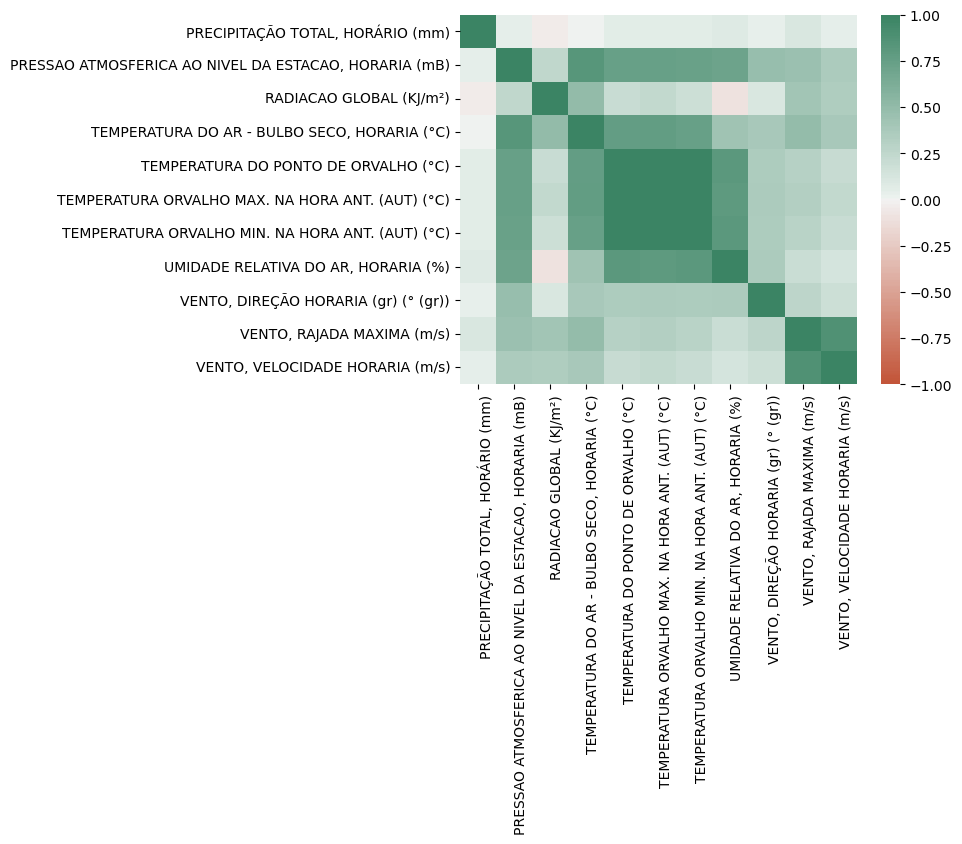

In [20]:
corr = dados.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 150, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='left'
);




C:\Users\rodri\AppData\Local\Temp\ipykernel_10516\3449338881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados_api.corr()


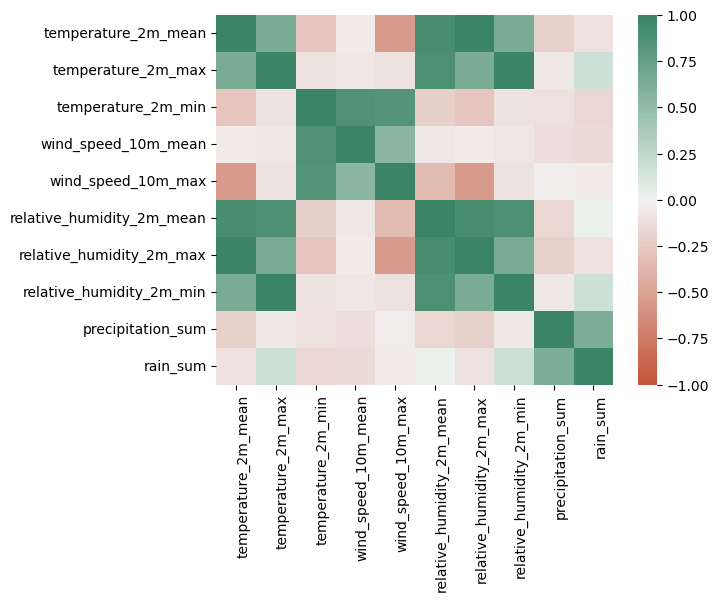

In [21]:
corr = dados_api.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 150, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='left'
);

In [22]:
dados = dados.sample(1000)

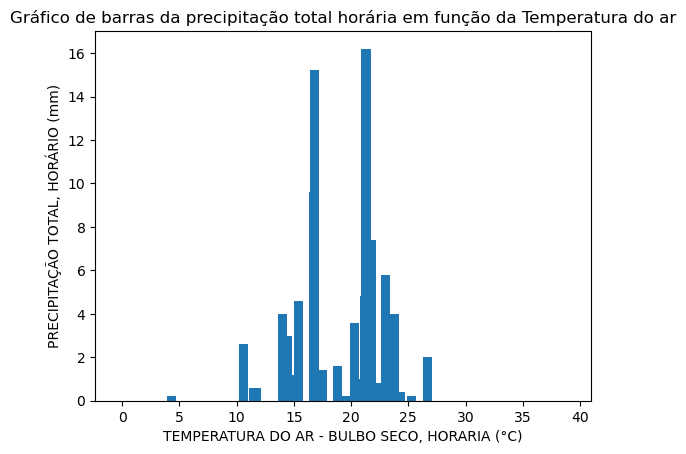

In [23]:
#Criando gráfico relacionando Velocidade do vento e precipitação total 
plt.bar(dados['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.xlabel('TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')
plt.ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')
plt.title('Gráfico de barras da precipitação total horária em função da Temperatura do ar')
plt.show()

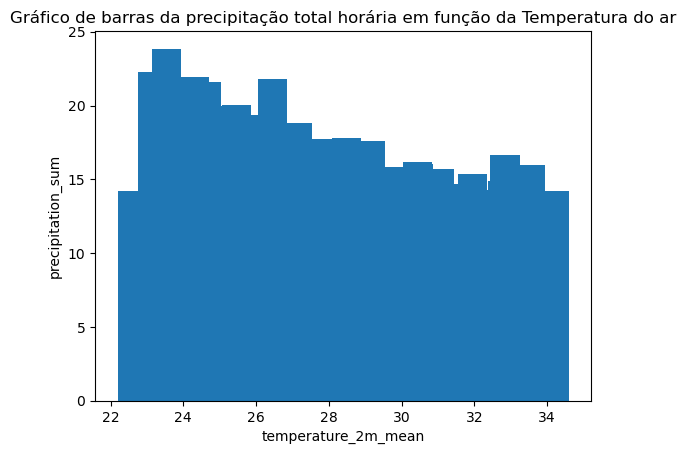

In [31]:
#Criando gráfico relacionando Velocidade do vento e precipitação total 
plt.bar(dados_api['temperature_2m_mean'], dados_api['precipitation_sum'])
plt.xlabel('temperature_2m_mean')
plt.ylabel('precipitation_sum')
plt.title('Gráfico de barras da precipitação total horária em função da Temperatura do ar')
plt.show()

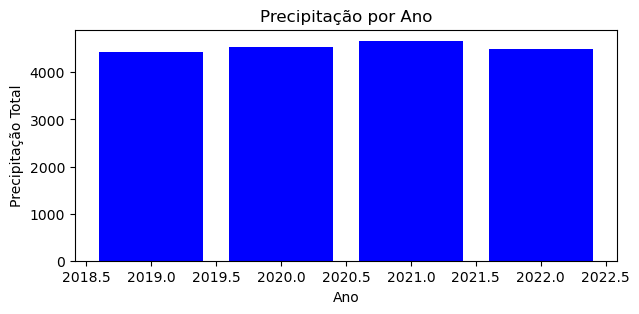

In [25]:
# Certifique-se de que a coluna 'date' está no formato datetime
dados_api['date'] = pd.to_datetime(dados_api['date'])

# Extração do ano e criação de uma nova coluna 'year'
dados_api['year'] = dados_api['date'].dt.year

# Agrupamento por ano e soma da precipitação
precipitacao_por_ano = dados_api.groupby('year')['precipitation_sum'].sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(7, 3))
plt.bar(precipitacao_por_ano['year'], precipitacao_por_ano['precipitation_sum'], color='blue')
plt.xlabel('Ano')
plt.ylabel('Precipitação Total')
plt.title('Precipitação por Ano')
plt.show()

In [26]:
#Verificando as estações com base no arquivo Estacoes.csv
estacoes = pd.read_csv('./Dados/Estacoes.csv') 

estacoes

,region,state,city_station,id_station,lat,lon,lvl,record_first,record_last
0,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,2022-08-31
1,NE,BA,SALVADOR,A401,"-13,01666666","-38,51666666","51,41",2000-05-13,2022-08-31
2,N,AM,MANAUS,A101,"-3,10333333","-60,01638888","61,25",2000-05-09,2022-08-31
3,SE,RJ,ECOLOGIA AGRICOLA,A601,"-22,8","-43,68333333",33,2000-05-07,2022-08-31
4,S,RS,PORTO ALEGRE,A801,"-30,05","-51,16666666","46,97",2000-09-22,2022-08-31
...,...,...,...,...,...,...,...,...,...
608,S,SC,CAMPOS NOVOS,A898,"-27,3886111","-51,21583333",963,2019-02-15,2022-08-31
609,SE,SP,CRIOSFERA,C891,-84,"-79,49416666",1285,2012-09-01,2020-12-31
610,N,PA,SANTA MARIA DAS BARREIRAS,A256,"-8,72972221","-49,85638888",165,2020-12-18,2022-08-31
611,SE,MG,POMPEU,A560,"-19,23249999","-44,96416666",705,2015-08-21,2022-08-31


In [27]:
#estacoes = estacoes[estacoes['region']=='NE']
estacoes = estacoes[estacoes['city_station']=='SALVADOR']